# ALG.Listes_chaînées
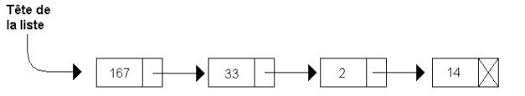


## <u>Activité 1</u> : ajout de fonctionnalités supplémentaires

Le programme suivant est celui présenté en cours et permet de construire une liste chaînée. Il y a cinq méthodes de définies :
- la méthode `length(self)` qui renvoie le nombre d'éléments de la liste,
- la méthode `__str__(self)` qui <b>surcharge</b> la fonction `print(obj)` habituelle,
- la méthode `add_front(self,val)` qui ajoute <i>val</i> en <u>début</u> de liste,
- la méthode `add_back(self,val)` qui ajoute <i>val</i> en <u>fin</u> de liste,
- la méthode `add(self,ind,val)`qui ajoute <i>val</i> à <u>l'indice souhaité</u> dans la liste.

In [ ]:
# Définit un élément d'une liste chaînée
class Cellule :
    def __init__(self,val,suiv) :
        self.valeur = val
        self.suivante = suiv
        
        
    def length(self) :
        long = 0
        liste = self # Liste de départ
        # Tant que la liste n'est pas vide
        while liste is not None :
            long += 1
            liste = liste.suivante
            
        return long
    
    
    # Affichage des valeurs de la liste
    def __str__(self) : # Permet de surcharger "print()"
        liste = self
        affichage = ""
        # Tant que l'on n'est pas en fin de liste
        while liste is not None :
            affichage += str(liste.valeur)
            # Pour éviter le ";" à la fin de la liste
            if liste.suivante is not None :
                affichage += " ; "
                
            liste = liste.suivante
        # Affiche les éléments séparés par un " ; "
        return affichage
    
    
    # Renvoie la valeur à l'indice `ind` de la liste
    def get(self,ind) :
        # Contrôle de la validité de l'indice ìnd`
        if ind < 0 or ind >= self.length() :
            raise IndexError("Indice non valide")
            
        lst = self
        num = 0 # Indices parcourus de la liste
        valeur = None
        
        while lst is not None :
            valeur = lst.valeur 
            
            # Si est au bon indice
            # on sort de la boucle
            if num == ind :
                break
            
            num += 1 # On passe à l'indice suivant
            lst = lst.suivante
            
        return valeur
                
    
    # Ajout en début de liste et renvoi
    def add_front(self,val) :
        nouv_cel = Cellule(val,self)
        return nouv_cel
            
    
    # Ajout en fin de liste et renvoi
    def add_back(self,val) :
        liste = self
        # Parcours de la liste pour trouver le dernier élément
        # Tant que l'on n'est pas en fin de liste
        while liste.suivante is not None :      
            liste = liste.suivante
        
        # Création et ajout du dernier élément
        liste.suivante = Cellule(val,None) 
        
        return self
        
       
    
    # Ajout dans la liste à un indice donné (partant de zéro)
    # On tient compte du fait qu'il y aura un élément de plus !
    def add(self,ind,val) : # Ajout de 'val' à l'indice 'ind'
        # Contrôle de la validité de la position
        if ind < 0 or ind > self.length() :
            raise IndexError("Erreur d'indice")
        # Cas particuliers
        if ind == 0 :
            return self.add_front(val)
        
        if ind == self.length() :
            return self.add_back(val)
        
        # Récupération du nième élément (liste)
        liste = self
        num = 0
        valeur = None
        # Parcours séquentiel de la liste
        while liste is not None :
            # Si on arrive au n - 1 ième élément, on quitte la boucle
            if num == ind - 1 : # Pour récupérer l'élément précédent
                break
            num += 1
            liste = liste.suivante
        
        # Le nouveau élément pointe vers l'élément suivant
        nouv_cel = Cellule(val,liste.suivante)
        # L'élément suivant de liste est bien nouv_cel
        liste.suivante = nouv_cel
        
        return self
        
        
        
# Création d'une liste chaînée : 1 ; 2 ; a ; x ; 6         
lst2 = Cellule(1, Cellule(2, Cellule("a", Cellule("x", Cellule (6,None)))))
lst2 = lst2.add_front("t") 
print(lst2)  # Attendu : t ; 1 ; 2 ; a ; x ; 6
lst2 = lst2.add_back(7)
print(lst2)  # Attendu : t ; 1 ; 2 ; a ; x ; 6 ; 7
lst2 = lst2.add(4,"v")
print(lst2)  # Attendu : t ; 1 ; 2 ; a ; v ; x ; 6 ; 7

1/ <b>Vérifier</b> que le programme fonctionne correctement.

2/ <b>Ajouter</b> les méthodes `pop_front(self)`et `pop_back(self)` qui permettent de supprimer respectivement le premier et le dernier élément d'une liste chaînée.
Ces méthodes devront retourner la nouvelle liste.
<b>Vérifier</b> à l'aide d'un jeu de tests que les méthodes fonctionnent bien.

<u>Remarque</u> : dans le langage Python, les ressources mémoires utilisées par les éléments supprimés de la liste ne sont pas nettoyées immédiatement ! C'est le langage qui s'en occupe tout seul par un système de <i>garbage collector</i>.
En langage C, il faudra désallouer manuellement la mémoire sous peine de <i>fuites de mémoire</i>.

<u>En savoir plus ici</u> : https://welovedevs.com/fr/articles/le-fonctionnement-du-garbage-collector/

3/ <b>Ajouter</b> une méthode `count(self,val)` qui permet de compter le nombre de fois (occurences) où <i>val</i> apparaît dans une liste. <b>Vérifier</b> à l'aide d'un jeu de tests que la méthode fonctionne bien.

### <u>Appel au professeur</u> (si besoin)


4/ (+) <b>Ajouter</b> une méthode `reverse(self)`qui permet d'inverser la liste. La méthode doit renvoyer la nouvelle liste. <b>Vérifier</b> à l'aide d'un jeu de tests que la méthode fonctionne bien.

## <u>Activité 2</u> : Encapsulation d'une liste dans un objet

L'idée est de définir une nouvelle classe `Liste` qui possède une unique attribut `premier` : en effet, il va simplement désigner le premier élément de la liste chaînée (ou <i>None</i> si elle est vide).
L'intérêt majeur de cette <b>encapsulation</b> est de permettre à l'utilisateur d'ignorer complètement la classe `Cellule` qu'il ne manipulera jamais.

In [ ]:
### La classe 'Cellule' est définie plus haut ###

# Encapsulation de la classe `Cellule`
class Liste :
    def __init__(self) :
        self.premier = None # Liste vide par défaut
    
    # Vérifie si la liste est vide
    def empty(self) :
        return self.premier == None
    
    # Renvoie la longueur de la liste
    def length(self) :
        return self.premier.length()
    
    # Ajoute en début de liste l'élément 'val'
    def add_front(self, val) :
        self.premier = Cellule(val,self.premier)
        return self
    
    # Ajoute en fin de liste l'élément 'val'
    def add_back(self, val) :
        self.premier = self.premier.add_back(val)
        return self
    
    # Ajout à un undice 'ind' souhaité de l'élément 'val'
    def add(self, ind, val) :
        self.premier = self.premier.add(ind,val)
        return self
    
    # Surcharge de la fonction print()
    def __str__(self) :
        return self.premier.__str__()
    

list1 = Liste()
list1.add_front("3")
list1.add_front(5)
list1.add_back("E")
print(list1.length()) # Attendu : 3
list1.add(2,8)
print(list1) # Attendu : 5 ,3, 8, E
list1.add(4,"T")
print(list1) # Attendu : 5 ,3, 8, E, T
list1.add(6,"T") # Attendu : erreur d'indice

1/ <b>Vérifier</b> que le programme fonctionne (faire des jeux de tests).

### <u>Quelques surcharges d'opérateurs classiques</u>
- La méthode `__getitem__(self, indice)` permet de charger l'opérateur [] qui permet <u>d'accéder à l'élément à l'indice souhaité</u> : on pourra ainsi écrire <i>list1[4]</i>, comme pour un tableau classique.
- La méthode `__add__(self, val)` permet <u>d'ajouter un élément à l'aide d'une simple addition en fin de liste</u> : on pourra écrire <i>list1 = list1 + val</i>
- La méthode `__len__(self)` permet de <u>retourner le nombre d'éléments</u> d'une liste : on pourra ainsi écrire <i>len(list1)</i>.


2/ <b>Ecrire</b> dans la classe `Liste` les méthodes ci-dessous. <b>Vérifier</b> par des jeux de tests que tout fonctionne.

<u>Aide</u> : ne pas hésiter à appeler les méthodes de la classe `Cellule`.

### <u>Appel au professeur</u> (si besoin).


<u>Conclusion</u> : L'encapsulation permet de simplifier grandement le code de l'utilisateur. De plus, une certaine homogénéité des méthodes est possible grâce au principe de surcharge. Ainsi `len(obj)` doit toujours intuitivement donner la taille d'un objet de type <i>tableau</i> (ou nombre d'éléments d'une liste), l'opérateur `[val]` permettra toujours d'accéder à l'élément voulu etc., il ne faut donc pas hésiter à l'utiliser pour rendre le code plus facilement utilisable par d'autres personnes.